<a href="https://colab.research.google.com/github/rajatc2/Machine-Learning/blob/main/MNIST/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification
## by Rajat Chakraborty

## 0.Initialization and functions

In [24]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

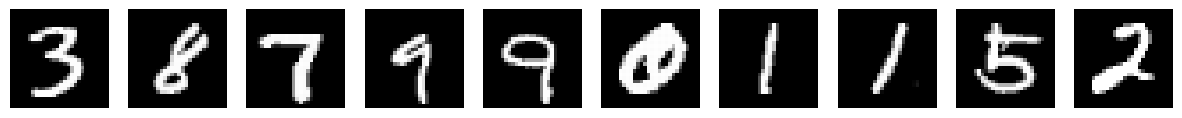

Total size: train=50000, val=10000, test =10000
Train subset size: xs=50, s=500, m=5000, all=50000
Class count for s: [56 57 51 49 46 46 50 51 40 54]


In [25]:
# example of using MNIST load, display, indices, and count functions
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, val={}, test ={}'.format(len(x_train), len(x_val), len(x_test)))
print('Train subset size: xs={}, s={}, m={}, all={}'.format(len(train_indices['xs']),len(train_indices['s']),len(train_indices['m']),len(train_indices['all'])))
print('Class count for s: {}'.format(class_count_mnist(y_train[train_indices['s']])))

In [ ]:
def find_error(y_pred,y_real):
  accuracy_=np.sum(y_pred==y_real)/len(y_pred)
  er=(1-accuracy_)*100
  print("Error is ", er)
  return er

In [ ]:
import time
import statistics as stat
from sklearn import metrics
from google.colab import files


## 1. KNN, Naive Bayes and Linear Logistic Regression

## 1a. KNN

In [ ]:
# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label.
         X_tst[i] is the ith example to classify.  K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label
  '''

  # needs code here
  y_pred=[]
  for i in range(len(X_tst)):
    dist=np.sum((X_trn-X_tst[i])**2, axis=1)
    kin=np.argsort(dist)[:K]
    y_pred.append(stat.mode(y_trn[kin]))
  return y_pred

In [ ]:
sz=1
start = time.time()
y=classify_KNN(x_train, y_train, x_val, K=1)
end= time.time()
print(end-start)
err=find_error(y,y_val[0:len(y)])

confusion_matrix = metrics.confusion_matrix(y_val[0:len(y)],y)
print(confusion_matrix)
a=np.sum(confusion_matrix, axis=1)
print(a)
perc_=confusion_matrix/a*100
print(np.round(perc_.astype('float'),1))

1997.5569953918457
Error is  3.0399999999999983
[[ 994    1    0    0    0    0    3    1    1    1]
 [   0 1123    0    0    0    0    0    2    1    1]
 [   6   12  944    8    0    1    1   13    2    4]
 [   2    1    2  982    0   18    2   10    8    7]
 [   0    6    1    0  941    0    2    2    0   28]
 [   2    1    1   14    1  829    9    0    3    3]
 [   4    4    0    0    1    1 1003    0    1    0]
 [   1    5    4    0    0    0    0 1051    0    9]
 [   5   12    4   12    7   10    5    4  879    6]
 [   3    0    0    2    8    2    1   11    1  950]]
[1001 1127  991 1032  980  863 1014 1070  944  978]
[[99.3  0.1  0.   0.   0.   0.   0.3  0.1  0.1  0.1]
 [ 0.  99.6  0.   0.   0.   0.   0.   0.2  0.1  0.1]
 [ 0.6  1.1 95.3  0.8  0.   0.1  0.1  1.2  0.2  0.4]
 [ 0.2  0.1  0.2 95.2  0.   2.1  0.2  0.9  0.8  0.7]
 [ 0.   0.5  0.1  0.  96.   0.   0.2  0.2  0.   2.9]
 [ 0.2  0.1  0.1  1.4  0.1 96.1  0.9  0.   0.3  0.3]
 [ 0.4  0.4  0.   0.   0.1  0.1 98.9  0.   0.1  0. 

## 1b. Naive Bayes

In [ ]:
from sys import last_value
# This is a suggested function definition for training Naive Bayes, but feel free to change it
def train_NB_mnist(X, y, alpha=1):
  '''
  Train P(x_f=v|y=c) for each feature f, value v, and class c.  Can assume 10 classes and that the features are binary variables
  Input: X[i] is the ith training data. y[i] is the ith training label. alpha is the count prior
  Output: return pxy of shape (Nf, 10, 2), where Nf is the number of features; pxy[f,c,v] is P(x_f=v|y=c)
  '''
  # needs code here
  X = np.where(X > 0.5, 1, 0)
  lvl=10
  n_feat=X.shape[1]
  #print(n_feat)
  pxy=np.zeros((n_feat,lvl,2))
  #print(X)
  #print(pxy.shape)
  for k in np.arange(lvl):
    for i in np.arange(n_feat):
      pxy[i,k,0]=(np.sum((X[:,i]==0) & (y==k))+alpha)/(np.sum(y==k)+alpha)
      pxy[i,k,1]=(np.sum((X[:,i]==1) & (y==k))+alpha)/(np.sum(y==k)+alpha)


  return pxy

# This is a suggested function definition for evauating Naive Bayes, but feel free to change it
def eval_NB_mnist(pxy, X):
  '''
  Evaluate naive bayes for mnist
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test label
  '''

  # needs code here
  X = np.where(X > 0.5, 1, 0)
  pxy=np.log(pxy)
  y_hat=np.matmul(1-X,pxy[:,:,0])+np.matmul(X,pxy[:,:,1])
  lvl=np.arange(10)
  y_pred=lvl[np.argmax(y_hat, axis=1)]

  return y_pred

In [ ]:
start = time.time()
p=train_NB_mnist(x_train, y_train, alpha=1)
end = time.time()
print('Time needed:', end-start)
#print(x_test.shape)

sz=50000
start = time.time()
y=eval_NB_mnist(p,x_val[0:sz])
#y=eval_NB_mnist(p,x_val)
end = time.time()
print((end-start)/100)
#print(y_pred.shape)
err=find_error(y,y_val[0:len(y)])
print(err)
print(y)
print(y_val[0:len(y)])

Time needed: 9.906074047088623
0.0034418821334838865
Error is  16.32
16.32
[5 0 4 ... 6 9 7]
[5 0 4 ... 6 9 7]


## 1c. Linear Logistic Regression

In [ ]:
#(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
start = time.time()
clf = LogisticRegression().fit(x_train, y_train)
end= time.time()
print(end-start)

sz=1
start= time.time()
#y_pred=clf.predict(x_val[0:sz])
y_pred=clf.predict(x_val)
end= time.time()
find_error(y_pred,y_val)
print('Time needed:', end-start)

27.002968072891235
Error is  7.530000000000003
Time needed: 0.024440526962280273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1d. Validation Error vs Training Size

KNN

In [ ]:
sz_exp=[50,500,5000]
err_knn=[]
for i in sz_exp:
  y=classify_KNN(x_train[0:i], y_train[0:i], x_val, K=1)
  err_knn.append(find_error(y,y_val))
  print('size=',i, "Done")

Error is  33.720000000000006
size= 50 Done
Error is  16.110000000000003
size= 500 Done
Error is  6.820000000000004
size= 5000 Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

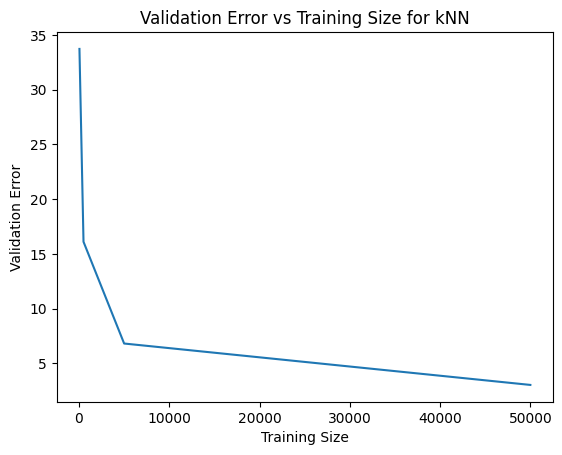

In [ ]:
sz_exp.append(50000)
err_knn.append(3.04)
plt.plot(sz_exp,err_knn)
# Set titles and labels
plt.title('Validation Error vs Training Size for kNN')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')

# Save the figure
plt.savefig('fig1d_1_val_error_vs_training_size_knn.png')
files.download('fig1d_1_val_error_vs_training_size_knn.png')

# Show the plot (optional)
plt.show()

Naive Bayes

In [ ]:
sz_exp=[50,500,5000,50000]
err_nb=[]
for i in sz_exp:
  p=train_NB_mnist(x_train[0:i], y_train[0:i], alpha=1)
  y=eval_NB_mnist(p,x_val)
  #find_error(y,y_val)
  err_nb.append(find_error(y,y_val))
  print('size=',i, "Done")

Error is  40.949999999999996
size= 50 Done
Error is  23.28
size= 500 Done
Error is  16.939999999999998
size= 5000 Done
Error is  16.32
size= 50000 Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

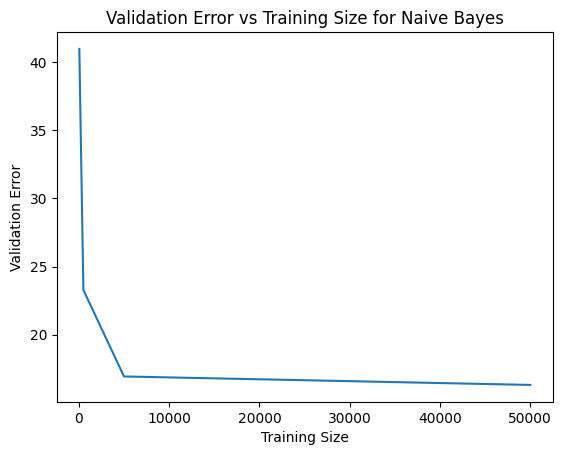

In [ ]:
plt.plot(sz_exp,err_nb)
# Set titles and labels
plt.title('Validation Error vs Training Size for Naive Bayes')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')

# Save the figure
plt.savefig('fig1d_2_val_error_vs_training_size_NB.png')
files.download('fig1d_2_val_error_vs_training_size_NB.png')

# Show the plot (optional)
plt.show()

Linear Logistic Regression

In [ ]:
sz_exp=[50,500,5000,50000]
err_lr=[]
for i in sz_exp:
  clf = LogisticRegression().fit(x_train[0:i], y_train[0:i])
  y=clf.predict(x_val)
  #find_error(y,y_val)
  err_lr.append(find_error(y,y_val))
  print('size=',i, "Done")

Error is  35.01
size= 50 Done
Error is  15.32
size= 500 Done


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.850000000000005
size= 5000 Done
Error is  7.530000000000003
size= 50000 Done


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

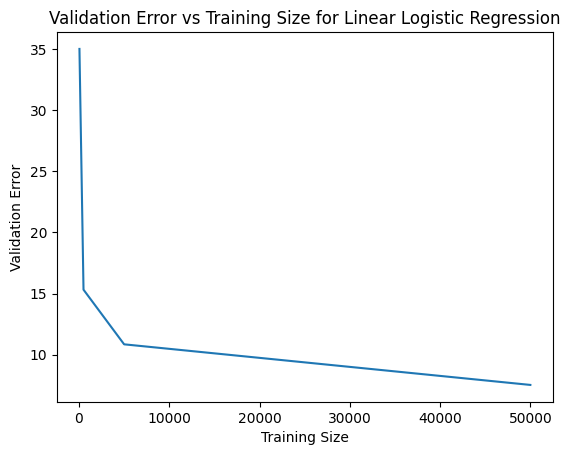

In [ ]:
plt.plot(sz_exp,err_lr)
# Set titles and labels
plt.title('Validation Error vs Training Size for Linear Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')

# Save the figure
plt.savefig('fig1d_3_val_error_vs_training_size_LLR.png')
files.download('fig1d_3_val_error_vs_training_size_LLR.png')

# Show the plot (optional)
plt.show()

All errors in one

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

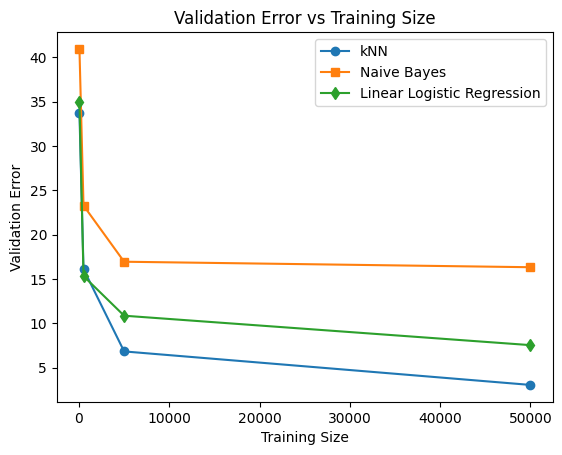

In [ ]:
plt.plot(sz_exp,err_knn,'o-',label='kNN')
plt.plot(sz_exp,err_nb,'s-',label='Naive Bayes')
plt.plot(sz_exp,err_lr,'d-',label='Linear Logistic Regression')
# Set titles and labels
plt.title('Validation Error vs Training Size')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.legend()

# Save the figure
plt.savefig('fig1d_4_val_error_vs_training_size.png')
files.download('fig1d_4_val_error_vs_training_size.png')

# Show the plot (optional)
plt.show()

# 1e. Parameter Selection

## K for KNN

In [ ]:
sz=500
for K in np.arange(5)+1:
  print("K=",K)
  y=classify_KNN(x_train[0:sz], y_train[0:sz], x_val, K)
  print("Validation ", end='')
  find_error(y,y_val)
  y=classify_KNN(x_train[0:sz], y_train[0:sz], x_test, K)
  print("Test ", end='')
  find_error(y,y_test)

K= 1
Validation Error is  16.110000000000003
Test Error is  16.220000000000002
K= 2
Validation Error is  16.110000000000003
Test Error is  16.220000000000002
K= 3
Validation Error is  17.03
Test Error is  16.64
K= 4
Validation Error is  16.92
Test Error is  16.43
K= 5
Validation Error is  18.159999999999997
Test Error is  17.569999999999997


## Alpha for Naive Bayes

In [ ]:
sz=5000
for i in (np.arange(10)+1)*0.001:
  print("Alpha=",i)
  p=train_NB_mnist(x_train[0:sz], y_train[0:sz], i)
  y=eval_NB_mnist(p,x_val)
  print("Validation ", end='')
  find_error(y,y_val)
  y=eval_NB_mnist(p,x_test)
  print("Test ", end='')
  find_error(y,y_test)

Alpha= 0.001
Validation Error is  16.479999999999993
Test Error is  15.890000000000004
Alpha= 0.002
Validation Error is  16.500000000000004
Test Error is  15.880000000000006
Alpha= 0.003
Validation Error is  16.53
Test Error is  15.900000000000002
Alpha= 0.004
Validation Error is  16.559999999999995
Test Error is  15.910000000000002
Alpha= 0.005
Validation Error is  16.549999999999997
Test Error is  15.959999999999997
Alpha= 0.006
Validation Error is  16.559999999999995
Test Error is  15.959999999999997
Alpha= 0.007
Validation Error is  16.559999999999995
Test Error is  15.959999999999997
Alpha= 0.008
Validation Error is  16.559999999999995
Test Error is  15.959999999999997
Alpha= 0.009000000000000001
Validation Error is  16.559999999999995
Test Error is  15.959999999999997
Alpha= 0.01
Validation Error is  16.53
Test Error is  15.959999999999997


## C for Logistic Regression

In [ ]:
sz=5000
for i in (np.arange(10)+1)*0.1:
  print("C=",i)
  clf = LogisticRegression(C=i).fit(x_train[0:sz], y_train[0:sz])
  y=clf.predict(x_val)
  a=find_error(y,y_val)
  y=clf.predict(x_test)
  print("Test ", end='')
  find_error(y,y_test)

C= 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  9.79
Test Error is  9.58
C= 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  9.809999999999997
Test Error is  9.770000000000001
C= 0.30000000000000004


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  9.98
Test Error is  9.850000000000003
C= 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.129999999999995
Test Error is  9.919999999999995
C= 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.329999999999995
Test Error is  10.07
C= 0.6000000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.399999999999999
Test Error is  10.160000000000002
C= 0.7000000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.470000000000002
Test Error is  10.360000000000003
C= 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.670000000000002
Test Error is  10.389999999999999
C= 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Error is  10.719999999999995
Test Error is  10.629999999999995
C= 1.0
Error is  10.850000000000005
Test Error is  10.629999999999995


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 1f. Improvement on kNN principle common analysis (PCA) and augmentation technique

## Feature Extraction using PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def feature_scaling_sklearn(x_train, x_val, x_test):
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train_n=scaler.transform(x_train)
  x_val_n=scaler.transform(x_val)
  x_test_n=scaler.transform(x_test)
  return x_train_n, x_val_n, x_test_n

def feature_pca(n,x_train, x_val, x_test):
  pca = PCA(n_components=n)
  pca.fit(x_train)
  x_train_n = pca.transform(x_train)
  x_val_n = pca.transform(x_val)
  x_test_n = pca.transform(x_test)
  return x_train_n, x_val_n, x_test_n

In [ ]:
x_train_n, x_val_n, x_test_n=feature_pca(35,x_train, x_val, x_test)
print(x_train_n.shape)

(50000, 35)


Error with only PCA

In [ ]:
s_train=50000
s_val= 10000
s_test=10000

y=classify_KNN(x_train_n[0:s_train], y_train[0:s_train], x_val_n[0:s_val], K=4)
print("Validation ", end='')
err=find_error(y,y_val[0:len(y)])
y=classify_KNN(x_train_n[0:s_train], y_train[0:s_train], x_test_n[0:s_test], K=4)
print("Test ", end='')
err=find_error(y,y_test[0:len(y)])

Validation Error is  2.210000000000001
Test Error is  2.4700000000000055


## Augmentation using shift

In [ ]:
# Method to shift the image by given dimension
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

# Creating Augmented Dataset
X_train_augmented = [image for image in x_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(x_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)

# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

print(X_train_augmented.shape)
print(x_train.shape)

<ipython-input-47-64e4fd530c33>:2: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


(250000, 784)
(50000, 784)


In [ ]:
x_train_n, x_val_n, x_test_n=feature_pca(35,X_train_augmented, x_val, x_test)

Error after using both augmentation and PCA

In [ ]:
s_train=250000
s_val= 10000
s_test=10000

y=classify_KNN(x_train_n, y_train_augmented, x_val_n, K=4)
print("Validation ", end='')
err=find_error(y,y_val[0:len(y)])

Validation Error is  1.649999999999996


In [ ]:
y=classify_KNN(x_train_n[0:s_train], y_train_augmented[0:s_train], x_test_n[0:s_test], K=4)
print("Test ", end='')
err=find_error(y,y_test[0:len(y)])

Test Error is  1.9199999999999995


# 2. MLP using Torch

# 2a. MLP on original data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# Sets device to "cuda" if a GPU is available  (in Colabs, enable GPU by Edit->Notebook Settings-->Hardware Accelerator=GPU)
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [ ]:
def display_error_curves(num_epochs, training_losses, validation_losses):
  """
  Plots the training and validation loss curves
  """

  plt.plot(range(num_epochs), training_losses, label="Training Loss")
  plt.plot(range(num_epochs), validation_losses, label="Validation Loss")

  # Add in a title and axes labels
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  # Display the plot
  plt.legend(loc='best')
  plt.show()

In [ ]:
# Define the model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # Needs code here
        self.layers = torch.nn.Sequential(
          torch.nn.Linear(input_size, hidden_size),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_size, output_size)
       )

    def forward(self, x):
      # Needs code here
      return self.layers(x)

In [ ]:
# This is a possible function definition for training MLP, but feel free to change it
def train_MLP_mnist(train_loader, val_loader, lr=1e-2, num_epochs=100):
  '''
  Train a MLP
  Input: X[i] is the ith training data. y[i] is the ith training label. alpha is the count prior
  Output: return a trained MLP
  '''
  # needs code here
  input_size =784
  hidden_size = 64
  output_size = 10

  # Instantiate the model
  mlp = MLP(input_size, hidden_size, output_size)
  loss_function = torch.nn.CrossEntropyLoss() # Cross entropy since there is only one output
  optimizer = torch.optim.SGD(mlp.parameters(), lr=lr) #SGD as per question

  # Train the model
  train_loss = []
  train_acc = []
  val_loss = []
  val_acc = []
  for epoch in range(0, num_epochs):
    if epoch % 20 == 0:
      print(epoch)

    mlp.train()
    current_loss = 0.0
    count = 0
    n_correct=0

    for i, data in enumerate(train_loader, 0):
    #for inputs, targets in train_loader:

      inputs, targets = data # Get inputs
      optimizer.zero_grad() # Zero the gradients
      outputs = mlp(inputs)  # Perform forward pass (predictions)
      loss = loss_function(outputs, targets.long()) # Compute loss
      loss.backward() # Perform backward pass (compute gradients)
      optimizer.step() # Perform optimization (update weights)

      # Print statistics
      current_loss += loss.item() * targets.size(0) # accumulate loss for plotting
      count += targets.size(0)
      _, predicted = torch.max(outputs.data, 1)
      n_correct += (predicted == targets).sum().item()

    train_loss.append(current_loss / len(train_loader.dataset))
    train_acc.append(100. * n_correct / count)

    mlp.eval()
    current_loss_val = 0.0
    count_val = 0
    n_correct_val=0

    with torch.no_grad():
      for i, data_val in enumerate(val_loader, 0):

        inputs_val, targets_val = data_val # Get inputs
        outputs_val = mlp(inputs_val)  # Perform forward pass (predictions)
        loss = loss_function(outputs_val, targets_val.long()) # Compute loss

      # Print statistics
        current_loss_val += loss.item() * targets_val.size(0) # accumulate loss for plotting
        count_val += targets_val.size(0)
        _, predicted_val = torch.max(outputs_val.data, 1)
        n_correct_val += (predicted_val == targets_val).sum().item()

    val_loss.append(current_loss_val / len(val_loader.dataset))
    val_acc.append(100. * n_correct_val / count_val)

  # Display Loss Curves
    if epoch % 10 == 9 or epoch==0 or epoch==24 or epoch==49 or epoch==99:
      print('Epoch:', epoch+1, 'Train Loss:', train_loss[-1], 'Train Accuracy:', train_acc[-1],
            'Validation Loss:', val_loss[-1], 'Validation Accuracy:', val_acc[-1])

  return mlp, np.array(train_loss), np.array(val_loss), np.array(train_acc), np.array(val_acc)



## 2ai. Epochs and Losses

In [ ]:
train_set = torch.utils.data.TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True)

val_set = torch.utils.data.TensorDataset(torch.Tensor(x_val), torch.Tensor(y_val))
val_loader = torch.utils.data.DataLoader(val_set, batch_size=256, shuffle=False)

test_set= torch.utils.data.TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))
test_set = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=False)

mlp, train_loss, val_loss, train_acc, val_acc = train_MLP_mnist(train_loader, val_loader, lr=0.1, num_epochs=100)

0
Epoch: 1 Train Loss: 0.8856788468074799 Train Accuracy: 78.91 Validation Loss: 0.426514039683342 Validation Accuracy: 88.82
Epoch: 10 Train Loss: 0.2038863350391388 Train Accuracy: 94.208 Validation Loss: 0.2089371665239334 Validation Accuracy: 93.98
Epoch: 20 Train Loss: 0.12753670897006988 Train Accuracy: 96.33 Validation Loss: 0.15164361540079116 Validation Accuracy: 95.46
20
Epoch: 25 Train Loss: 0.10742490135908127 Train Accuracy: 96.974 Validation Loss: 0.13158635283708572 Validation Accuracy: 96.03
Epoch: 30 Train Loss: 0.09285074108600616 Train Accuracy: 97.384 Validation Loss: 0.12125233435630799 Validation Accuracy: 96.39
Epoch: 40 Train Loss: 0.07280169976472854 Train Accuracy: 97.98 Validation Loss: 0.11198823215961456 Validation Accuracy: 96.66
40
Epoch: 50 Train Loss: 0.05907953946590424 Train Accuracy: 98.372 Validation Loss: 0.102772045981884 Validation Accuracy: 96.95
Epoch: 60 Train Loss: 0.0491193555021286 Train Accuracy: 98.686 Validation Loss: 0.09864538358449935

## 2aii. Learning Rates and Losses

0
Epoch: 1 Train Loss: 0.5340501669502258 Train Accuracy: 83.242 Validation Loss: 0.3263593180179596 Validation Accuracy: 89.02
Epoch: 10 Train Loss: 0.05588150841236114 Train Accuracy: 98.316 Validation Loss: 0.13515375851392747 Validation Accuracy: 96.0
Epoch: 20 Train Loss: 0.024615206246972086 Train Accuracy: 99.266 Validation Loss: 0.11348697628974914 Validation Accuracy: 97.27
20
Epoch: 25 Train Loss: 0.041591351775974034 Train Accuracy: 98.87 Validation Loss: 0.11208866513967514 Validation Accuracy: 97.19
Epoch: 30 Train Loss: 0.009345644614100456 Train Accuracy: 99.836 Validation Loss: 0.12200294176340103 Validation Accuracy: 97.27
Epoch: 40 Train Loss: 0.004207422193288803 Train Accuracy: 99.97 Validation Loss: 0.13560381420254708 Validation Accuracy: 97.05
40
Epoch: 50 Train Loss: 0.002384945796169341 Train Accuracy: 99.998 Validation Loss: 0.13770154725313186 Validation Accuracy: 97.34
Epoch: 60 Train Loss: 0.0016192027588561176 Train Accuracy: 99.998 Validation Loss: 0.1441

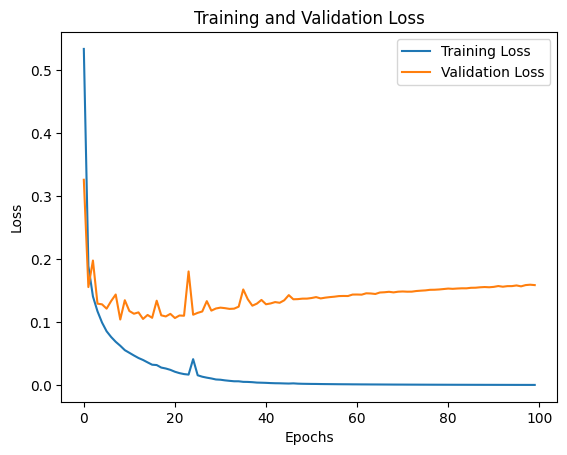

0
Epoch: 1 Train Loss: 2.130475676498413 Train Accuracy: 47.272 Validation Loss: 1.8981088119506835 Validation Accuracy: 64.88
Epoch: 10 Train Loss: 0.43343548086166384 Train Accuracy: 88.454 Validation Loss: 0.416495161485672 Validation Accuracy: 88.99
Epoch: 20 Train Loss: 0.3388605161571503 Train Accuracy: 90.422 Validation Loss: 0.3305236767530441 Validation Accuracy: 90.96
20
Epoch: 25 Train Loss: 0.31767941228866575 Train Accuracy: 90.904 Validation Loss: 0.3108551771879196 Validation Accuracy: 91.48
Epoch: 30 Train Loss: 0.3011855661201477 Train Accuracy: 91.394 Validation Loss: 0.2955473090171814 Validation Accuracy: 91.86
Epoch: 40 Train Loss: 0.27523940361976623 Train Accuracy: 92.158 Validation Loss: 0.27242480250597 Validation Accuracy: 92.43
40
Epoch: 50 Train Loss: 0.2548067200756073 Train Accuracy: 92.756 Validation Loss: 0.254274554336071 Validation Accuracy: 92.94
Epoch: 60 Train Loss: 0.23782102715492248 Train Accuracy: 93.308 Validation Loss: 0.23904127926826477 Vali

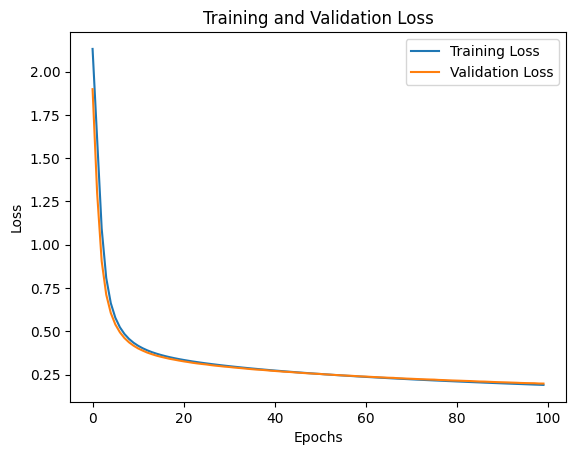

0
Epoch: 1 Train Loss: 2.29329803604126 Train Accuracy: 10.308 Validation Loss: 2.2737009647369386 Validation Accuracy: 16.11
Epoch: 10 Train Loss: 1.8663128342056274 Train Accuracy: 65.664 Validation Loss: 1.8252133968353272 Validation Accuracy: 67.75
Epoch: 20 Train Loss: 1.2559474158477784 Train Accuracy: 78.11 Validation Loss: 1.2176755630493163 Validation Accuracy: 78.81
20
Epoch: 25 Train Loss: 1.0392229191207887 Train Accuracy: 80.38 Validation Loss: 1.0099117794036865 Validation Accuracy: 81.01
Epoch: 30 Train Loss: 0.8886311022758484 Train Accuracy: 82.0 Validation Loss: 0.866247563457489 Validation Accuracy: 82.71
Epoch: 40 Train Loss: 0.7069889853096009 Train Accuracy: 84.17 Validation Loss: 0.6918573721885681 Validation Accuracy: 84.69
40
Epoch: 50 Train Loss: 0.6054507749176026 Train Accuracy: 85.688 Validation Loss: 0.5931547435760498 Validation Accuracy: 86.07
Epoch: 60 Train Loss: 0.5413000973320007 Train Accuracy: 86.744 Validation Loss: 0.5302881501674652 Validation A

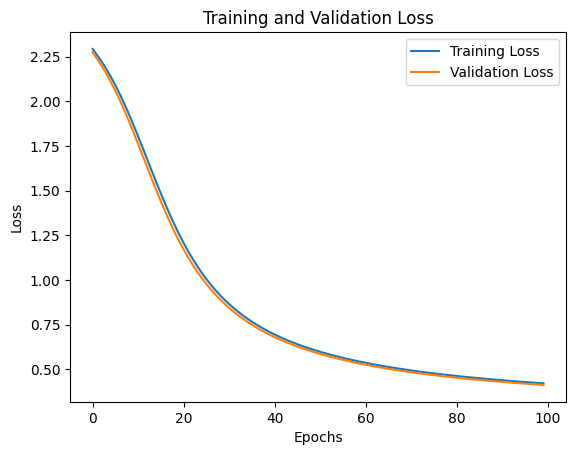

In [ ]:
mlp, train_loss, val_loss, train_acc, val_acc = train_MLP_mnist(train_loader, val_loader, lr=1, num_epochs=100)
display_error_curves(100, train_loss, val_loss)

mlp, train_loss, val_loss, train_acc, val_acc = train_MLP_mnist(train_loader, val_loader, lr=0.01, num_epochs=100)
display_error_curves(100, train_loss, val_loss)

mlp, train_loss, val_loss, train_acc, val_acc = train_MLP_mnist(train_loader, val_loader, lr=0.001, num_epochs=100)
display_error_curves(100, train_loss, val_loss)

## 2aiii. Improving the Model

In [ ]:
# Define the model
class MLP2c(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP2c, self).__init__()
        # Needs code here
        self.layers = torch.nn.Sequential(
          torch.nn.Linear(input_size, hidden_size[0]),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_size[0], hidden_size[1]),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_size[1], hidden_size[2]),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_size[2], output_size)
       )

    def forward(self, x):
      # Needs code here
      return self.layers(x)

# This is a possible function definition for training MLP, but feel free to change it
def train_MLP_mnist2c(train_loader, val_loader, lr=1e-2, num_epochs=100,hidden_size=[64,64,64],ip_size=784):
  '''
  Train a MLP
  Input: X[i] is the ith training data. y[i] is the ith training label. alpha is the count prior
  Output: return a trained MLP
  '''
  # needs code here
  input_size =ip_size
  output_size = 10

  # Instantiate the model
  mlp = MLP2c(input_size, hidden_size, output_size)
  loss_function = torch.nn.CrossEntropyLoss() # Cross entropy since there is only one output
  optimizer = torch.optim.Adam(mlp.parameters(), lr=lr) #Adam

  # Train the model
  train_loss = []
  train_acc = []
  val_loss = []
  val_acc = []
  for epoch in range(0, num_epochs):
    mlp.train()
    current_loss = 0.0
    count = 0
    n_correct=0

    for i, data in enumerate(train_loader, 0):
    #for inputs, targets in train_loader:

      inputs, targets = data # Get inputs
      optimizer.zero_grad() # Zero the gradients
      outputs = mlp(inputs)  # Perform forward pass (predictions)
      loss = loss_function(outputs, targets.long()) # Compute loss
      loss.backward() # Perform backward pass (compute gradients)
      optimizer.step() # Perform optimization (update weights)

      # Print statistics
      current_loss += loss.item() * targets.size(0) # accumulate loss for plotting
      count += targets.size(0)
      _, predicted = torch.max(outputs.data, 1)
      n_correct += (predicted == targets).sum().item()

    train_loss.append(current_loss / len(train_loader.dataset))
    train_acc.append(100. * n_correct / count)

    mlp.eval()
    current_loss_val = 0.0
    count_val = 0
    n_correct_val=0

    with torch.no_grad():
      for i, data_val in enumerate(val_loader, 0):

        inputs_val, targets_val = data_val # Get inputs
        outputs_val = mlp(inputs_val)  # Perform forward pass (predictions)
        loss = loss_function(outputs_val, targets_val.long()) # Compute loss

      # Print statistics
        current_loss_val += loss.item() * targets_val.size(0) # accumulate loss for plotting
        count_val += targets_val.size(0)
        _, predicted_val = torch.max(outputs_val.data, 1)
        n_correct_val += (predicted_val == targets_val).sum().item()

    val_loss.append(current_loss_val / len(val_loader.dataset))
    val_acc.append(100. * n_correct_val / count_val)

  # Display Loss Curves
    if epoch % 20 == 19:
      print('Epoch:', epoch+1, 'Train Loss:', train_loss[-1], 'Train Accuracy:', train_acc[-1],
            'Validation Loss:', val_loss[-1], 'Validation Accuracy:', val_acc[-1])

  return mlp, np.array(train_loss), np.array(val_loss), np.array(train_acc), np.array(val_acc)



In [ ]:
train_set = torch.utils.data.TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)

val_set = torch.utils.data.TensorDataset(torch.Tensor(x_val), torch.Tensor(y_val))
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set= torch.utils.data.TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

hidden_size=[128,128,64]
mlp,training_losses,validation_losses,training_accs,validation_accs = train_MLP_mnist2c(train_loader, val_loader, lr=0.0085, num_epochs=128,hidden_size=[128,128,128])

Epoch: 20 Train Loss: 0.0240034316688776 Train Accuracy: 99.294 Validation Loss: 0.13616805055141304 Validation Accuracy: 97.43
Epoch: 40 Train Loss: 0.019533414725065232 Train Accuracy: 99.508 Validation Loss: 0.18318063614834101 Validation Accuracy: 97.07
Epoch: 60 Train Loss: 0.015046443383544683 Train Accuracy: 99.648 Validation Loss: 0.21040444557674418 Validation Accuracy: 97.68
Epoch: 80 Train Loss: 0.00892314763671253 Train Accuracy: 99.792 Validation Loss: 0.2464953340113163 Validation Accuracy: 97.65
Epoch: 100 Train Loss: 0.02174853464052081 Train Accuracy: 99.622 Validation Loss: 0.21715993555486202 Validation Accuracy: 97.55
Epoch: 120 Train Loss: 0.0020424412134243176 Train Accuracy: 99.94 Validation Loss: 0.28491690715998413 Validation Accuracy: 97.82


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(model, data_loader):
    y_true = []
    y_pred = []
    for inputs, labels in data_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true += labels.tolist()
        y_pred += predicted.tolist()
    cm = confusion_matrix(y_true, y_pred)
    mean_accuracy = accuracy_score(y_true, y_pred)
    err_=100*(1-mean_accuracy)
    return cm,mean_accuracy,err_

cm, mean_accuracy,err_ = evaluate_model(mlp, train_loader)
print("Train Error =", err_, "%")
cm, mean_accuracy,err_ = evaluate_model(mlp, val_loader)
print("Validation Error =", err_, "%")
cm, mean_accuracy,err_ = evaluate_model(mlp, test_loader)
print("Test Error =", err_, "%")

Train Error = 0.17800000000000038 %
Validation Error = 2.4399999999999977 %
Test Error = 2.400000000000002 %


# 2b. MLP after using PCA and Augmentation on Data

In [ ]:
# Method to shift the image by given dimension
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

# Creating Augmented Dataset
X_train_augmented = [image for image in x_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(x_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)

# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

print(X_train_augmented.shape)
print(x_train.shape)

<ipython-input-13-64e4fd530c33>:2: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


(250000, 784)
(50000, 784)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def feature_scaling_sklearn(x_train, x_val, x_test):
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train_n=scaler.transform(x_train)
  x_val_n=scaler.transform(x_val)
  x_test_n=scaler.transform(x_test)
  return x_train_n, x_val_n, x_test_n

def feature_pca(n,x_train, x_val, x_test):
  pca = PCA(n_components=n)
  pca.fit(x_train)
  x_train_n = pca.transform(x_train)
  x_val_n = pca.transform(x_val)
  x_test_n = pca.transform(x_test)
  return x_train_n, x_val_n, x_test_n

n_feat=35
x_train_n, x_val_n, x_test_n=feature_pca(n_feat,X_train_augmented, x_val, x_test)
print(x_train_n.shape)
print(x_train_n.shape[1])

(250000, 35)
35


In [ ]:
train_set = torch.utils.data.TensorDataset(torch.Tensor(x_train_n), torch.Tensor(y_train_augmented))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)

val_set = torch.utils.data.TensorDataset(torch.Tensor(x_val_n), torch.Tensor(y_val))
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set= torch.utils.data.TensorDataset(torch.Tensor(x_test_n), torch.Tensor(y_test))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)


In [ ]:
hidden_size=[128,128,64]
mlp,training_losses,validation_losses,training_accs,validation_accs = train_MLP_mnist2c(train_loader, val_loader, lr=0.0085, num_epochs=128,hidden_size=[128,128,128],ip_size=n_feat)

Epoch: 20 Train Loss: 0.02976019416670501 Train Accuracy: 99.18 Validation Loss: 0.1098447504496522 Validation Accuracy: 98.31
Epoch: 40 Train Loss: 0.02283665160912275 Train Accuracy: 99.4436 Validation Loss: 0.11063703806460835 Validation Accuracy: 98.53
Epoch: 60 Train Loss: 0.023791042604863644 Train Accuracy: 99.4944 Validation Loss: 0.13972488556690488 Validation Accuracy: 98.37
Epoch: 80 Train Loss: 0.018997901400342583 Train Accuracy: 99.5984 Validation Loss: 0.17644302319382005 Validation Accuracy: 98.43
Epoch: 100 Train Loss: 0.019904162859097123 Train Accuracy: 99.5856 Validation Loss: 0.1811051609268148 Validation Accuracy: 98.55
Epoch: 120 Train Loss: 0.024755555669575928 Train Accuracy: 99.552 Validation Loss: 0.24229864283854258 Validation Accuracy: 98.07


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(model, data_loader):
    y_true = []
    y_pred = []
    for inputs, labels in data_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true += labels.tolist()
        y_pred += predicted.tolist()
    cm = confusion_matrix(y_true, y_pred)
    mean_accuracy = accuracy_score(y_true, y_pred)
    err_=100*(1-mean_accuracy)
    return cm,mean_accuracy,err_

cm, mean_accuracy,err_ = evaluate_model(mlp, train_loader)
print("Train Error =", err_, "%")
cm, mean_accuracy,err_ = evaluate_model(mlp, val_loader)
print("Validation Error =", err_, "%")
cm, mean_accuracy,err_ = evaluate_model(mlp, test_loader)
print("Test Error =", err_, "%")

Train Error = 0.36720000000000086 %
Validation Error = 1.6299999999999981 %
Test Error = 1.7800000000000038 %


# 3. Clustering and Fast Retrieval with KNN and Faiss

In [2]:
!apt install libomp-dev
!pip install faiss-cpu

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libomp-14-dev libomp5-14
Suggested packages:
  libomp-14-doc
The following NEW packages will be installed:
  libomp-14-dev libomp-dev libomp5-14
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 738 kB of archives.
After this operation, 8,991 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp5-14 amd64 1:14.0.0-1ubuntu1.1 [389 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp-14-dev amd64 1:14.0.0-1ubuntu1.1 [347 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libomp-dev amd64 1:14.0-55~exp2 [3,074 B]
Fetched 738 kB in 0s (1,766 kB/s)
Selecting previously unselected package libomp5-14:amd64.
(Reading database ... 123605 files and directories currently installed.)
Preparing to unpack .../libomp5-14_1%3a

In [3]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
import time
import faiss
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images (can print 1 row OR 1 column)
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  s = np.ceil(max(subplot_rows, subplot_cols)/10)
  if subplot_rows>1 or subplot_cols>1:
      fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
      for i in range(len(x)):
        ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
        ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

In [4]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
#display_mnist(x_train[:10],1,10)
print('Total size: train={}, val={}, test ={}'.format(len(x_train), len(x_val), len(x_test)))
print('Train subset size: xs={}, s={}, m={}, all={}'.format(len(train_indices['xs']),len(train_indices['s']),len(train_indices['m']),len(train_indices['all'])))
print('Class count for s: {}'.format(class_count_mnist(y_train[train_indices['s']])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Total size: train=50000, val=10000, test =10000
Train subset size: xs=50, s=500, m=5000, all=50000
Class count for s: [56 57 51 49 46 46 50 51 40 54]


In [5]:
## Helper functions

# Returns the purity of the clustering according to labels,
# and the label counts of each cluster
def get_purity(labels, cluster_idx):
  nclasses = int(max(labels)+1)
  nidx = int(max(cluster_idx)+1)
  counts = np.zeros((nidx, nclasses), np.int32)
  for i in range(len(labels)):
    c = labels[i]
    idx = cluster_idx[i]
    counts[idx, c]+=1
  purity = np.sum(np.max(counts, axis=1))/len(cluster_idx)
  return purity, counts

# Returns an index list that can be used to re-order the counts according to
# which label is most common
def get_cluster_order(counts):
  idx = np.argmax(counts, axis=1)
  idx = np.argsort(idx)
  return idx

## 3a. Clustering

Current K value:  10
39.33664


<ipython-input-5-9cedcbd8b386>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nidx = int(max(cluster_idx)+1)


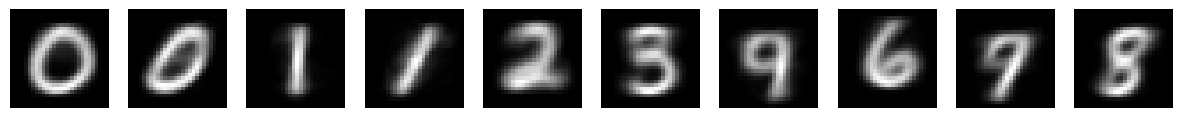

Current K value:  20
35.5171


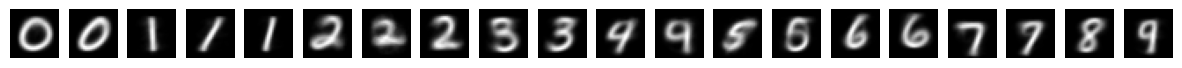

Current K value:  30
33.1933


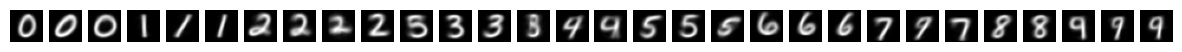

Current K value:  40
32.01629


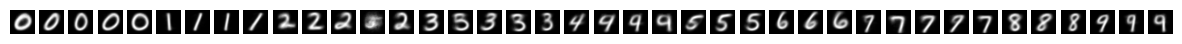

Current K value:  50
30.97206


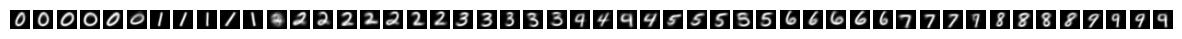

Current K value:  60
30.156387


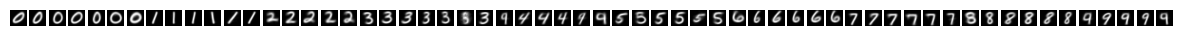

Current K value:  70
29.590675


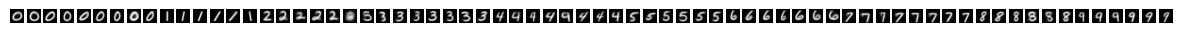

Current K value:  80
29.035444


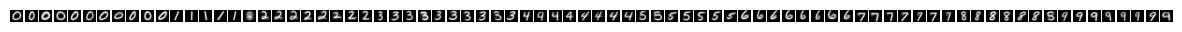

Current K value:  90
28.616865


Current K value:  100
28.234766


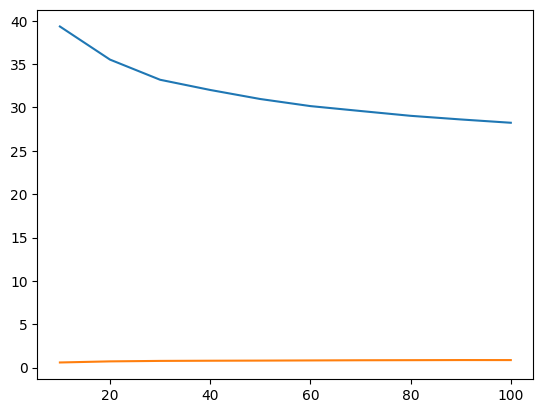

In [6]:
# set dimensions
dim = x_train.shape[1]

# Set the number of clusters
clusters =  [10, 20, 30,40,50,60,70,80,90, 100]
#clusters=[10,20]

purity_k = []
mean_k = []

for K in clusters:
  print('Current K value: ', K)
  # Initialize the k-means clustering object
  kmeans = faiss.Kmeans(dim, K, niter=50,nredo=5, verbose=True)

  # Train the k-means model
  kmeans.train(x_train)

  # Assign each data point to a cluster
  dist, cluster_idx = kmeans.index.search(x_test, 1)

  # Record and print Purity
  print(dist.mean())
  purity, counts = get_purity(y_test, cluster_idx)
  idx = get_cluster_order(counts)
  display_mnist(kmeans.centroids[idx, :],1,K)

  #Get Cluster indexes & Display the centroids


  # Record and print Average Distance
  mean_k.append(dist.mean())
  purity_k.append(purity)

#Plot K vs Purity and K vs Mean_Distances
plt.plot(clusters,mean_k)
plt.plot(clusters,purity_k)

(10.0, 100.0)

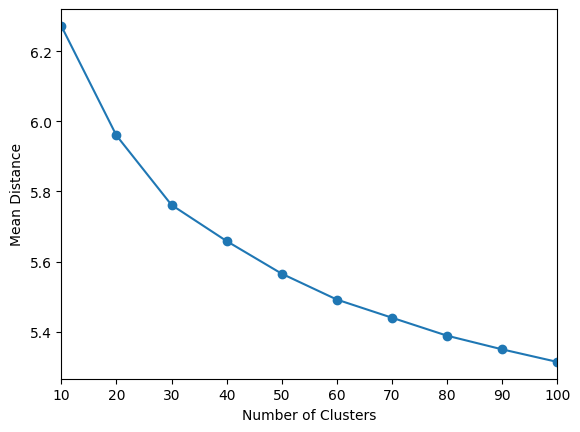

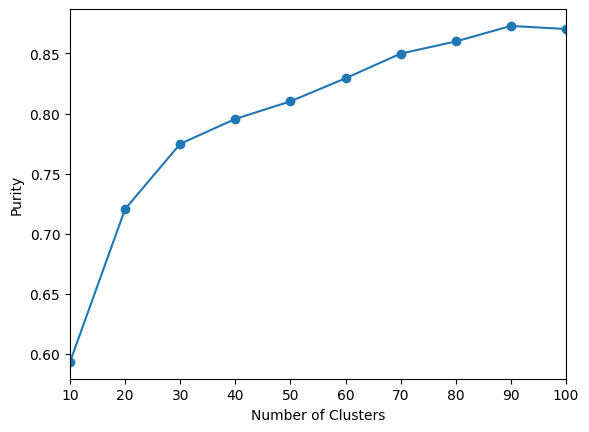

In [7]:
plt.figure()
plt.plot(clusters,np.sqrt(mean_k),'-o')
plt.xlim([10,100])
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Distance')
plt.figure()
plt.plot(clusters,purity_k,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Purity')
plt.xlim([10,100])

## 3b. Fast Retrieval

Brute Force (IndexFlatL2)

In [8]:
# set dimensions
dim = x_train.shape[1]

start_time = time.time()

# Initialize the index for Brute Force

index_flatl2= faiss.IndexFlatL2 (dim)


# Add Data & Print time to add
ad_data=time.time()
index_flatl2.add (x_train)
print('Time to add: ',time.time()-ad_data)

# Perform Search and Compute Time required
search_data=time.time()
dist, idx = index_flatl2.search(x_test, k=1)
print('Time to search: ',time.time()-search_data)

print('Total time: ',time.time()-start_time)

# Compute Test Error
nn_labels = y_train[idx.flatten()]
print(nn_labels.shape)
print(y_test.shape)
num_errors = np.sum(nn_labels != y_test)
test_error = num_errors / len(y_test)
print ('Test Error: ',test_error*100,'%')

Time to add:  0.20708703994750977
Time to search:  16.315914154052734
Total time:  16.52473020553589
(10000,)
(10000,)
Test Error:  3.3099999999999996 %


LSH

In [9]:
# set dimensions
dim = x_train.shape[1]
n_bits=int(dim*2)

print(type(dim),type(n_bits))

start_time = time.time()
# Initialize the index for Brute Force

index_lsh= faiss.IndexLSH (dim,n_bits)


# Add Data & Print time to add
add_time=time.time()
index_lsh.add (x_train)
print('Time to add: ',time.time()-add_time)

# Perform Search and Compute Time required
search_time=time.time()
dist, idx = index_lsh.search(x_test, k=1)
print('Time to search: ',time.time()-search_time)

print('Total time: ',time.time()-start_time)

# Compute Test Error
nn_labels = y_train[idx.flatten()]
print(nn_labels.shape)
print(y_test.shape)
num_errors = np.sum(nn_labels != y_test)
test_error = num_errors / len(y_test)
print ('Test Error: ',test_error*100,'%')

<class 'int'> <class 'int'>
Time to add:  3.5230894088745117
Time to search:  16.997206211090088
Total time:  21.16727900505066
(10000,)
(10000,)
Test Error:  3.18 %


# 4. PCA and Data Compression

## 4a. PCA

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import faiss

(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()

(10, 784)


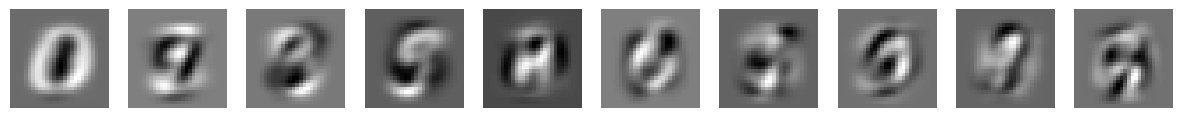

In [11]:
# Compute the principal components using x_train
pca = PCA()
pca.fit(x_train)

# Display First 10 Components
first_10_pca = pca.components_[:10]

# Print the result
print(first_10_pca.shape)
display_mnist(first_10_pca,1,10)

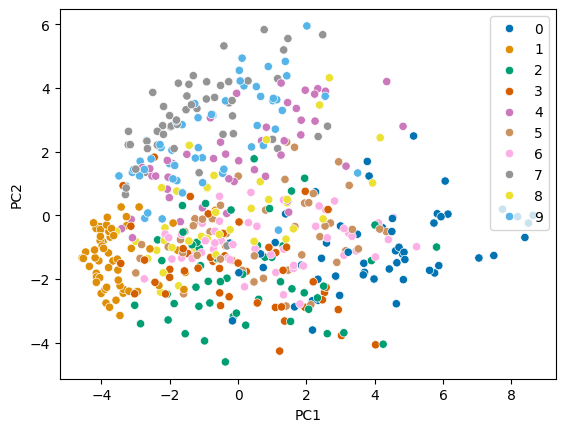

In [12]:
# Scatter plot of first two PCA dimensions
import seaborn as sns  #sns.scatterplot(x, y, hue=labels)
import pandas as pd

pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data
x_train_pca = pca.fit_transform(x_train[train_indices['s']])

# Convert the transformed data to a Pandas DataFrame
df = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2'])

# Plot the scatterplot of the first two PCA dimensions using Seaborn
sns.scatterplot(df, x='PC1', y='PC2', hue=y_train[train_indices['s']], palette='colorblind')

# Show the plot
plt.show()

784


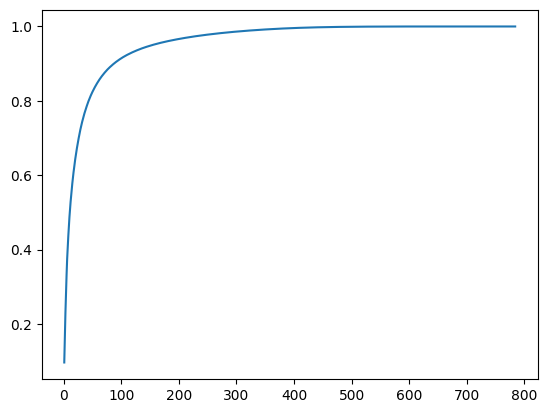

In [15]:
# Plot cumulative explained variance

pca = PCA()
pca.fit(x_train)
exp_var_pca = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var_pca)
print(len(cum_exp_var))
n_feat=np.array(range(len(cum_exp_var)))+1
plt.plot(n_feat,cum_exp_var)

In [16]:
# Select number of dimensions that explains 90% of variance, according to your plot above
idx = np.searchsorted(cum_exp_var, 0.9, side='right')
print(idx)
print(n_feat[idx])
print(cum_exp_var[100])
print(cum_exp_var[idx])

87
88
0.915464966941597
0.9011603843897691


In [17]:
# Transform with components that explain 90% variance
pca = PCA(n_components=88)
pca.fit(x_train)
x_train_n = pca.transform(x_train)
x_val_n = pca.transform(x_val)
x_test_n = pca.transform(x_test)

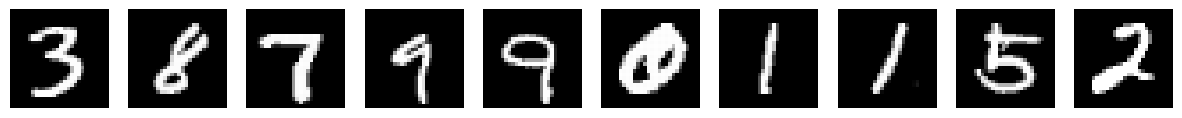

(88, 784)


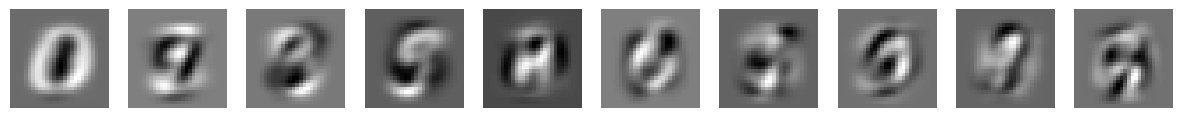

In [18]:
# Display the first 10 samples before and after PCA compression
display_mnist(x_train[:10],1,10)
print(pca.components_.shape)
display_mnist(pca.components_[:10],1,10)

## 4b. Fast Retrieval after PCA

In [19]:
## Brute Force (IndexFlatL2)

# set dimensions
dim = x_train_n.shape[1]

start_time = time.time()

# Initialize the index for Brute Force

index_flatl2= faiss.IndexFlatL2 (dim)


# Add Data & Print time to add
ad_data=time.time()
index_flatl2.add (x_train_n)
print('Time to add: ',time.time()-ad_data)

# Perform Search and Compute Time required
search_data=time.time()
dist, idx = index_flatl2.search(x_test_n, k=1)
print('Time to search: ',time.time()-search_data)

print('Total time: ',time.time()-start_time)

# Compute Test Error
nn_labels = y_train[idx.flatten()]
print(nn_labels.shape)
print(y_test.shape)
num_errors = np.sum(nn_labels != y_test)
test_error = num_errors / len(y_test)
print ('Test Error: ',test_error*100,'%')

Time to add:  0.09845209121704102
Time to search:  4.498076677322388
Total time:  4.60765528678894
(10000,)
(10000,)
Test Error:  2.8899999999999997 %


## 4c. MDS and t-SNE

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import faiss
import seaborn as sns  #sns.scatterplot(x, y, hue=labels)
import pandas as pd

(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()

MDS

<Axes: >

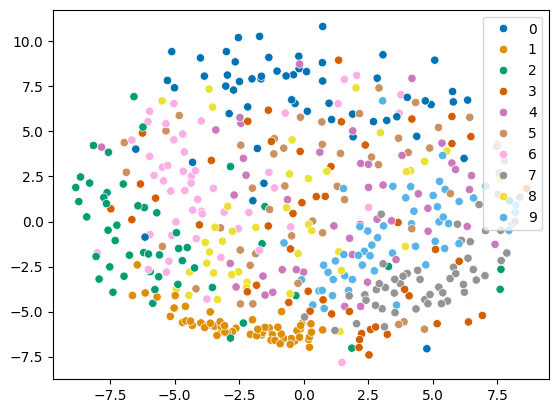

In [21]:
pca=PCA()
pca.fit(x_train)
x_train_n=pca.transform(x_train)
ind=train_indices['s']
x_mds=MDS(n_components=2).fit_transform(x_train_n[ind,:30])
sns.scatterplot(x=x_mds[ind,0],y=x_mds[ind,1],hue=y_train[ind],palette='colorblind')

t-SNE

<Axes: >

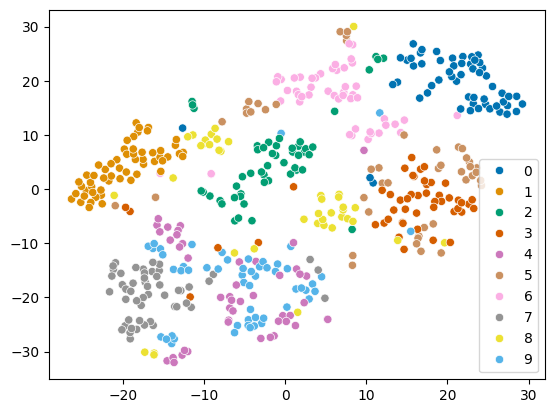

In [22]:
pca=PCA()
pca.fit(x_train)
x_train_n=pca.transform(x_train)
ind=train_indices['s']
x_tsne=TSNE(n_components=2).fit_transform(x_train_n[ind,:30])
sns.scatterplot(x=x_tsne[ind,0],y=x_tsne[ind,1],hue=y_train[ind],palette='colorblind')